# Proyecto Integrador

El objetivo de este entregable es analizar el conjunto de datos de nuestro proyecto integrador del diplomado.
Realizaremos un análisis exploratorio estadístico para comprender la composición de nuestro conjunto de datos para el set de flights.csv con información de operaciones aéreas que se nos proporcionó (citar fuente).

Primero importaremos los datos y los módulos con los que trabajaremos y a continuación definiremos las tareas que se realizarán como parte del entregable:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

#airline_path = 'datasets/airlines.csv'
#airport_path = 'datasets/airports.csv'
flights_path = '../../datasets/flights.csv'

In [5]:
# Set data on import
def parse_if_str(s):
    try: return str(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

# def parse_ndarray(s):
#     return np.fromstring(s, sep=' ') if s else None

In [65]:
fdf = pd.read_csv(flights_path, converters = {
    'DESTINATION_AIRPORT': parse_if_str,
    'ORIGIN_AIRPORT': parse_if_str})

## Parte I: Análisis exploratorio 

1. Medidas de tendencia central

    a.	Explora las variables del conjunto de datos flights.csv, observa lo siguiente:
        
        i. La forma de los datos. Utiliza las funciones de pandas para obtener información sobre la cantidad de filas y columnas existentes. 
        ii. La cantidad de datos faltantes. Obtén un resumen de los datos faltantes de las variables en el conjunto de datos y observa si puede ser un problema para el análisis.
        iii. Tipos de datos de las variables. Explora el tipo de dato de las variables y analiza si son los tipos esperados.
        iv. Estadísticas generales de las variables
            1. Máximo y mínimo
            2. Media y mediana
            
    b.	Explora las medidas de tendencia central de los retrasos en las aerolíneas, contesta las siguientes preguntas:
        
        i. ¿Qué destinos tienen mayor cantidad de vuelos en nuestro conjunto de datos?
        ii. ¿Qué aerolíneas tienen mayor cantidad de vuelos en nuestro conjunto de datos?
        iii. ¿Qué aerolíneas presentan más retrasos?
        iv. ¿Qué destinos presentan más retrasos?
        v. ¿Cuáles son los retrasos más grandes en las aerolíneas?
        vi. Compara las medidas de dispersión entre las aerolíneas.

2.	Distribuciones de probabilidad
    
    a.	Explora las distribuciones de los datos
    
        i.	Grafica la distribución de tiempos de retraso de los vuelos y contesta las siguientes preguntas:
            1.	¿Cómo se distribuye el tiempo de retraso?
            2.	¿Es parecido a una distribución normal?
            3.	¿Parece seguir alguna otra distribución? 



## Parte II: Intervalos de confianza y pruebas de hipótesis

3.	Incertidumbre e intervalos de confianza

        a.	Calcula el promedio de retraso de cada aerolínea
        
        b.	Calcula los intervalos de confianza con un 95% de confianza
        
        c.	Grafica los intervalos de confianza 

4.	Pruebas de hipótesis
    
        a.	Plantear el problema
        
            i.	Tenemos que decidir entre una aerolínea u otra. Somos viajeros frecuentes en Spirit Air Lines, si queremos viajar con la menor posibilidad de retrasos nos han recomendado United Airlines. Corroboremos con base en datos si cambiar de aerolínea a United Airlines. 
    
        b.	Plantear la hipótesis
        
            i.	Plantea la hipótesis nula y la hipótesis alternativa. 
    
        c.	Utiliza una prueba t para probar o rechazar la hipótesis, escribe tus conclusiones con base en los resultados obtenidos. 


## Parte III:  Ingeniería de variables

5.	Ingeniería de variables
    
       a.Importancia de variables
        
            i. Determina la variable objetivo del problema.
            ii. Calcula la matriz de correlación
            iii. Determina las variables más relevantes para la variable objetivo.  

        b.	Imputación e interacción entre variables
        
            i. Exploración de los datos nulos
            ii. De las variables relevantes, ¿cuántos datos estamos perdiendo?
            iii. Analiza si podemos hacer una imputación sobre esas variables y escribe tus conclusiones. 


### 5. Ingeniería de variables

#### b. Imputación e interaccion entre variables

In [8]:
fdf.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<AxesSubplot:>

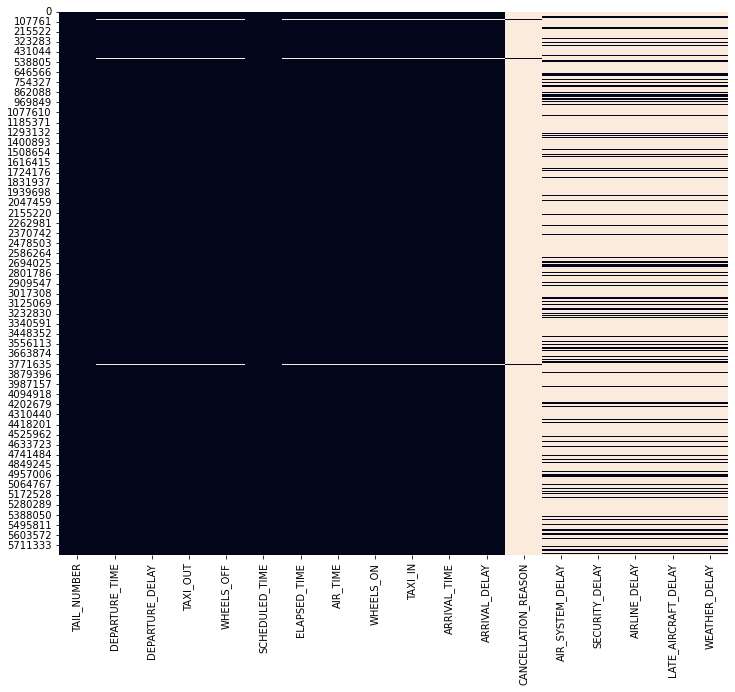

In [18]:
# Missing values cols
mcol = ["TAIL_NUMBER", "DEPARTURE_TIME", "DEPARTURE_DELAY", "TAXI_OUT", "WHEELS_OFF", "SCHEDULED_TIME", "ELAPSED_TIME", "AIR_TIME", "WHEELS_ON", "TAXI_IN", "ARRIVAL_TIME", "ARRIVAL_DELAY", "CANCELLATION_REASON", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
plt.figure(figsize=(12,10))
sns.heatmap(fdf[mcol].isnull(), cbar=False)

In [66]:
pd.DataFrame(round(100 * fdf.isnull().sum() /fdf.shape[0])).T

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,98.0,82.0,82.0,82.0,82.0,82.0


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Inicialmente observamos que hay varias variables con datos faltantes, y observamos que hay un patrón en este comportamiento, vamos a observar las filas de los datos faltantes para entender este comportamiento</li>
    
</ul>
</p>

In [15]:
pd.set_option('display.max_columns', None)
fdf[fdf['TAIL_NUMBER'].isna()].sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5657956,2015,12,21,1,OO,4796,NaN,SUN,SLC,1252,NaN,NaN,NaN,NaN,62.0,NaN,NaN,222,NaN,NaN,1354,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
484213,2015,2,2,1,WN,465,NaN,MDW,BNA,615,NaN,NaN,NaN,NaN,90.0,NaN,NaN,395,NaN,NaN,745,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
5563031,2015,12,15,2,AA,2015,NaN,IND,CLT,1350,NaN,NaN,NaN,NaN,100.0,NaN,NaN,427,NaN,NaN,1530,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
144295,2015,1,10,6,US,1983,NaN,SAT,CLT,820,NaN,NaN,NaN,NaN,159.0,NaN,NaN,1095,NaN,NaN,1159,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
5764541,2015,12,28,1,UA,320,NaN,SLC,ORD,1234,NaN,NaN,NaN,NaN,180.0,NaN,NaN,1250,NaN,NaN,1634,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2358506,2015,5,30,6,US,1729,NaN,EWR,CLT,805,NaN,NaN,NaN,NaN,119.0,NaN,NaN,529,NaN,NaN,1004,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
495600,2015,2,2,1,UA,1674,NaN,DEN,LGA,1730,NaN,NaN,NaN,NaN,219.0,NaN,NaN,1620,NaN,NaN,2309,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
5565628,2015,12,15,2,F9,265,NaN,DEN,SNA,1635,NaN,NaN,NaN,NaN,148.0,NaN,NaN,846,NaN,NaN,1803,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
820636,2015,2,23,1,AA,2362,NaN,DFW,OMA,2115,NaN,NaN,NaN,NaN,105.0,NaN,NaN,583,NaN,NaN,2300,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
5199961,2015,11,21,6,UA,793,NaN,ORD,LAX,1607,NaN,NaN,NaN,NaN,276.0,NaN,NaN,1744,NaN,NaN,1843,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [69]:
print(f"Todos los tail number faltantes corresponden a vuelos cancelados {fdf[fdf['TAIL_NUMBER'].isna()]['CANCELLED'].sum()}")
print(f"... que es el {fdf[fdf['TAIL_NUMBER'].isna()]['CANCELLED'].sum()/fdf.shape[0]*100:.2}% de los datos")


Todos los tail number faltantes corresponden a vuelos cancelados 14721
... que es el 0.25% de los datos


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Observamos que los valores con los tail number faltantes son de vuelos cancelados</li>
    <li>Al ser un vuelo cancelado, no puede ser un vuelo retrasado, por lo tanto esperamos que las columnas con las razones de los retrasos estén vacías
</ul>
</p>

In [89]:
print(f"Los tail number faltantes son el {(fdf['TAIL_NUMBER'].isna().sum() / fdf[fdf['CANCELLED']==1].shape[0] * 100):.2}% de los vuelos cancelados")

Los tail number faltantes son el 1.6e+01% de los vuelos cancelados


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Aunque hay mas vuelos cancelados que sí tienen tail number</li>
    <li>Estos vuelos puede que hayan comenzado procedimiento de despegue y fuera cancelado posteriormente y por eso algunos si fueron asignados tail number e incluso algunos conteos de operación</li>
</ul>
</p>

In [26]:
fdf[fdf['CANCELLED']==1][mcol].isna().sum()

TAIL_NUMBER            14721
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
WHEELS_ON              89884
TAXI_IN                89884
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

<AxesSubplot:>

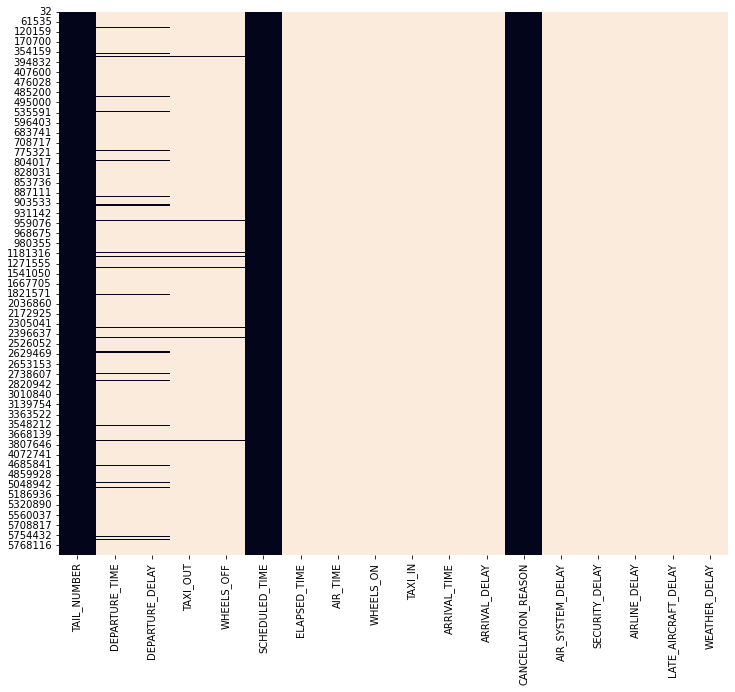

In [31]:
#fdf[fdf['CANCELLED']==1 & ~fdf['TAIL_NUMBER'].isnull()].head()
plt.figure(figsize=(12,10))
sns.heatmap(fdf[fdf['CANCELLED']==1 & ~fdf['TAIL_NUMBER'].isnull()][mcol].isnull(), cbar=False)

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Algunos de los vuelos cancelados tienen registros de tiempo de salida y retraso, inlcudo despegue aunque fueron cancelados posteriormente</li>
</ul>
</p>

In [35]:
fdf[fdf['ARRIVAL_DELAY']>0].sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4824773,2015,10,28,3,AA,2340,N3DLAA,11278,13930,1825,1924.0,59.0,89.0,2053.0,134.0,194.0,93.0,612,2126.0,12.0,1939,2138.0,119.0,0,0,NaN,60.0,0.0,2.0,57.0,0.0
2027545,2015,5,9,6,OO,2871,N492SW,SAN,LAX,1525,1537.0,12.0,15.0,1552.0,46.0,47.0,25.0,109,1617.0,7.0,1611,1624.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2607197,2015,6,14,7,UA,1248,N77295,DEN,DCA,955,1004.0,9.0,33.0,1037.0,207.0,206.0,170.0,1476,1527.0,3.0,1522,1530.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3153363,2015,7,16,4,WN,2425,N564WN,MCI,BOS,1935,2001.0,26.0,7.0,2008.0,175.0,166.0,153.0,1256,2341.0,6.0,2330,2347.0,17.0,0,0,NaN,0.0,0.0,1.0,16.0,0.0
1698947,2015,4,19,7,UA,676,N469UA,IAH,SEA,1130,1159.0,29.0,13.0,1212.0,286.0,268.0,246.0,1874,1418.0,9.0,1416,1427.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1071431,2015,3,11,3,WN,432,N8606C,BWI,STL,1635,1637.0,2.0,15.0,1652.0,140.0,139.0,119.0,738,1751.0,5.0,1755,1756.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1544345,2015,4,9,4,UA,444,N426UA,SFO,IAH,1610,1800.0,110.0,29.0,1829.0,224.0,237.0,196.0,1635,2345.0,12.0,2154,2357.0,123.0,0,0,NaN,13.0,0.0,0.0,110.0,0.0
52093,2015,1,4,7,EV,6178,N18120,CMH,IAH,1124,1144.0,20.0,11.0,1155.0,185.0,226.0,197.0,986,1412.0,18.0,1329,1430.0,61.0,0,0,NaN,51.0,0.0,10.0,0.0,0.0
390902,2015,1,26,1,DL,2329,N981DL,DFW,ATL,1700,1651.0,-9.0,14.0,1705.0,126.0,141.0,107.0,731,1952.0,20.0,2006,2012.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4192039,2015,9,18,5,DL,1776,N335NB,MSO,MSP,1430,1440.0,10.0,15.0,1455.0,151.0,147.0,129.0,1013,1804.0,3.0,1801,1807.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Observamos que tienden a tener más datos en las columnas de delay, aunque algunas siguen siendo null</li>
    <li>No se observan registros de vuelos cancelados a primera instancia</li>
</ul>
</p>

In [36]:
fdf[~fdf["AIR_SYSTEM_DELAY"].isna()].isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1063439
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>La info que falta aquí solo son los valores de razones de cancelación, que es algo esperado</li>
</ul>
</p>

In [40]:
fdf[~fdf["AIR_SYSTEM_DELAY"].isna()].head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,304.0,-3.0,25.0,329.0,173.0,196.0,160.0,1129,509.0,11.0,500,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,535.0,95.0,9.0,544.0,185.0,175.0,163.0,1189,727.0,3.0,605,730.0,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Esperaríamos que los vuelos con retraso de llegada indicara un valor causante del retraso pero hay algunas instancias que no indican valores en las siguientes columnas</li>
    <li>AIR_SYSTEM_DELAY 	SECURITY_DELAY 	AIRLINE_DELAY 	LATE_AIRCRAFT_DELAY 	WEATHER_DELAY</li>
    <li> A estos valores podemos imputar valores de 0 </li>
</ul>
</p>


In [90]:
# dfdf = fdf[fdf["ARRIVAL_DELAY"]>0][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value=0)
# Hacemos un subset para los registros únicamente con vuelos retrasados en su llegada
dfdf = fdf[fdf["ARRIVAL_DELAY"]>0].fillna(value=0)

In [53]:
dfdf.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,2086896.0,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2086896.0,2086896.0,2086896.0,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06
mean,2015.0,6.308791e+00,1.562066e+01,3.901104e+00,2.192427e+03,1.408835e+03,1.439572e+03,3.029037e+01,1.931110e+01,1.463732e+03,1.408967e+02,1.437193e+02,1.159162e+02,8.229071e+02,1.543925e+03,8.491993e+00,1.567492e+03,1.543965e+03,3.311299e+01,0.0,0.0,0.0,6.869419e+00,3.880644e-02,9.666488e+00,1.196127e+01,1.485571e+00
std,0.0,3.415252e+00,8.771919e+00,1.969718e+00,1.793685e+03,4.687567e+02,4.926831e+02,5.460699e+01,1.213032e+01,4.959864e+02,7.503877e+01,7.612393e+01,7.371173e+01,6.070102e+02,5.540563e+02,7.631191e+00,5.050546e+02,5.632350e+02,5.294251e+01,0.0,0.0,0.0,2.109573e+01,1.530578e+00,3.566397e+01,3.299331e+01,1.465892e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.140000e+02,1.025000e+03,1.043000e+03,0.000000e+00,1.200000e+01,1.059000e+03,8.500000e+01,8.800000e+01,6.100000e+01,3.720000e+02,1.159000e+03,5.000000e+00,1.210000e+03,1.200000e+03,6.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,6.000000e+00,1.600000e+01,4.000000e+00,1.676000e+03,1.433000e+03,1.457000e+03,1.300000e+01,1.600000e+01,1.512000e+03,1.220000e+02,1.260000e+02,9.700000e+01,6.510000e+02,1.629000e+03,6.000000e+00,1.630000e+03,1.631000e+03,1.500000e+01,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,5.000000e+00,3.296000e+03,1.805000e+03,1.837000e+03,3.800000e+01,2.300000e+01,1.854000e+03,1.720000e+02,1.770000e+02,1.470000e+02,1.065000e+03,2.005000e+03,1.000000e+01,2.000000e+03,2.009000e+03,3.800000e+01,0.0,0.0,0.0,2.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,0.0,0.0,0.0,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [59]:
# Eliminamos los parámetros de los vuelos cancelados
dfdf.drop(["DIVERTED", "CANCELLED", "CANCELLATION_REASON"], axis=1, inplace=True)

<AxesSubplot:>

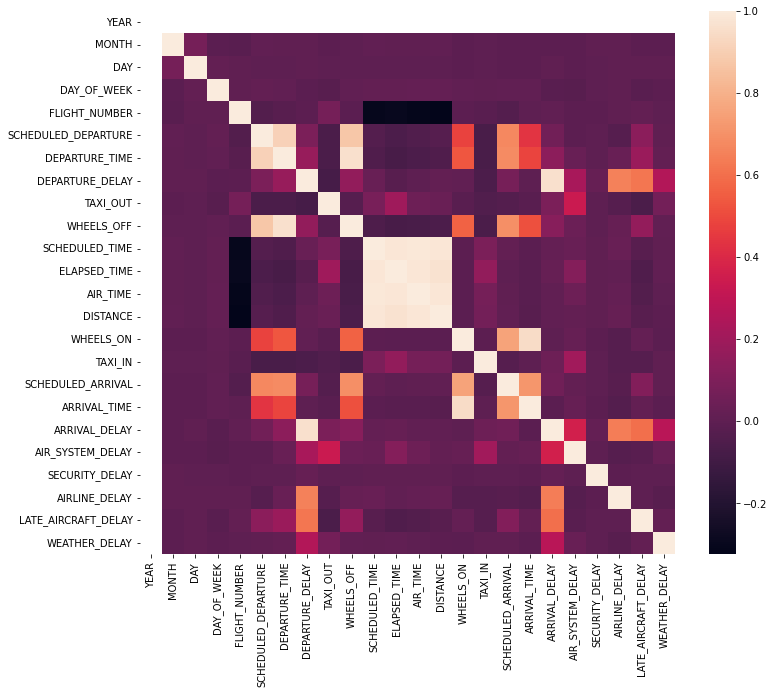

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(dfdf.corr())

In [62]:
# Podemos imputar los valores en nuestro main dataset
fdf[['SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = fdf[['SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value=0)


In [63]:
fdf.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               0
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    Los valores restantes tienen que ver con la falta de registros por la cancelación de los vuelos.<br>
    Creamos un subset con los registros de vuelos retrasados; en este podemos eliminar la información de los vuelos cancelados y concentrarnos en las variables que afectan los restrasos.
</p>

|Variable | Missing value | Comment |
|------------|------------------|---|
|TAIL_NUMBER |              14721| Los tail number faltantes son por vuelos cancelados|
|DEPARTURE_TIME |           86153| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|DEPARTURE_DELAY |          86153| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|TAXI_OUT |                 89047| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|WHEELS_OFF |               89047| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|SCHEDULED_TIME |               6| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ELAPSED_TIME |            105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|AIR_TIME |                105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|WHEELS_ON |                92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|TAXI_IN |                  92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ARRIVAL_TIME |             92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ARRIVAL_DELAY |           105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|CANCELLATION_REASON |    5729195| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|AIR_SYSTEM_DELAY |       4755640| Estos registros dan información de causas de retraso y fueron imputados|
|SECURITY_DELAY |         4755640| Estos registros dan información de causas de retraso y fueron imputados|
|AIRLINE_DELAY |          4755640| Estos registros dan información de causas de retraso y fueron imputados|
|LATE_AIRCRAFT_DELAY |    4755640| Estos registros dan información de causas de retraso y fueron imputados|
|WEATHER_DELAY |          4755640| Estos registros dan información de causas de retraso y fueron imputados|

<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    En conclusión, los registros no contendrán información de retraso si el vuelo fue cancelado y viceversa.
    El comportamiento es consistente, por lo que podemos usar la informacion que se nos da tomando esto en cuenta. De igual manera, podemos hacer un subset con la info de los registros de vuelos retrasados e imputar datos para trabajar específicamente con estos datos
</p>